In [1]:
import pickle
import copy
import pandas as pd
from scipy import stats
from experiments import *
from utils import *

Definitions

In [2]:
scenarios = {'harness_truthfulqa_mc_0':['harness_truthfulqa_mc_0'],
             'gsm8k':['harness_gsm8k_5'], 
             'winogrande':['harness_winogrande_5'], 
             'arc':['harness_arc_challenge_25'], 
             'hellaswag':['harness_hellaswag_10'],
             'mmlu':['harness_hendrycksTest_abstract_algebra_5', 
                     'harness_hendrycksTest_anatomy_5', 
                     'harness_hendrycksTest_astronomy_5', 
                     'harness_hendrycksTest_business_ethics_5', 
                     'harness_hendrycksTest_clinical_knowledge_5', 
                     'harness_hendrycksTest_college_biology_5', 
                     'harness_hendrycksTest_college_chemistry_5', 
                     'harness_hendrycksTest_college_computer_science_5', 
                     'harness_hendrycksTest_college_mathematics_5', 
                     'harness_hendrycksTest_college_medicine_5', 
                     'harness_hendrycksTest_college_physics_5', 
                     'harness_hendrycksTest_computer_security_5', 
                     'harness_hendrycksTest_conceptual_physics_5', 
                     'harness_hendrycksTest_econometrics_5', 
                     'harness_hendrycksTest_electrical_engineering_5', 
                     'harness_hendrycksTest_elementary_mathematics_5', 
                     'harness_hendrycksTest_formal_logic_5', 
                     'harness_hendrycksTest_global_facts_5', 
                     'harness_hendrycksTest_high_school_biology_5', 
                     'harness_hendrycksTest_high_school_chemistry_5', 
                     'harness_hendrycksTest_high_school_computer_science_5', 
                     'harness_hendrycksTest_high_school_european_history_5', 
                     'harness_hendrycksTest_high_school_geography_5', 
                     'harness_hendrycksTest_high_school_government_and_politics_5', 
                     'harness_hendrycksTest_high_school_macroeconomics_5', 
                     'harness_hendrycksTest_high_school_mathematics_5', 
                     'harness_hendrycksTest_high_school_microeconomics_5', 
                     'harness_hendrycksTest_high_school_physics_5', 
                     'harness_hendrycksTest_high_school_psychology_5', 
                     'harness_hendrycksTest_high_school_statistics_5', 
                     'harness_hendrycksTest_high_school_us_history_5', 
                     'harness_hendrycksTest_high_school_world_history_5', 
                     'harness_hendrycksTest_human_aging_5', 
                     'harness_hendrycksTest_human_sexuality_5', 
                     'harness_hendrycksTest_international_law_5', 
                     'harness_hendrycksTest_jurisprudence_5', 
                     'harness_hendrycksTest_logical_fallacies_5', 
                     'harness_hendrycksTest_machine_learning_5', 
                     'harness_hendrycksTest_management_5', 
                     'harness_hendrycksTest_marketing_5', 
                     'harness_hendrycksTest_medical_genetics_5', 
                     'harness_hendrycksTest_miscellaneous_5', 
                     'harness_hendrycksTest_moral_disputes_5', 
                     'harness_hendrycksTest_moral_scenarios_5', 
                     'harness_hendrycksTest_nutrition_5', 
                     'harness_hendrycksTest_philosophy_5', 
                     'harness_hendrycksTest_prehistory_5', 
                     'harness_hendrycksTest_professional_accounting_5', 
                     'harness_hendrycksTest_professional_law_5', 
                     'harness_hendrycksTest_professional_medicine_5', 
                     'harness_hendrycksTest_professional_psychology_5',
                     'harness_hendrycksTest_public_relations_5', 
                     'harness_hendrycksTest_security_studies_5', 
                     'harness_hendrycksTest_sociology_5', 
                     'harness_hendrycksTest_us_foreign_policy_5', 
                     'harness_hendrycksTest_virology_5', 
                     'harness_hendrycksTest_world_religions_5']}

## Data

Loading data

In [3]:
with open('data/lb.pickle', 'rb') as handle:
    data = pickle.load(handle)

## Results

In [4]:
device = 'cuda'
iterations = 3
Ds = [5, 10, 15] #

In [5]:
set_of_rows = [list(range(14))]
set_of_rows

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]

### Predicting accuracy

Full (one IRT model for all scenarios)

In [6]:
scenario_name = 'full' #we are evaluating all scenarios at once
chosen_scenarios = list(scenarios.keys())
sampling = {'random_sampling':True,'anchor_sampling':True,
            'anchor-irt_sampling':True,'disc_sampling':False}
results_full, accs_full = evaluate_scenarios(data, scenario_name, chosen_scenarios, scenarios, set_of_rows, Ds, iterations, device, bench='irt_lb', sampling = sampling)


Evaluating models [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

i) choosing optimal D


  0%|                                                     | 0/3 [00:00<?, ?it/s]

[11:57:25] config: model_type='multidim_2pl' epochs=2000              cli.py:109
           priors='hierarchical' initializers=[] dims=5 lr=0.1                  
           lr_decay=0.9999 dropout=0.5 hidden=100 vocab_size=None               
           log_every=2000 seed=42 deterministic=True                            
           data_path: data/irt_lb/rows-0:1:2:3:4:5:6:7:8:9:10:11:12:1 cli.py:111
           3_scenario-full_val.jsonlines                                        
           output directory: models/irt_lb/rows-0:1:2:3:4:5:6:7:8:9:1 cli.py:112
           0:11:12:13_D-5_scenario-full_val/                                    
[11:57:25] amortized: False                                       dataset.py:112
[11:57:27] Vocab size: None                                       training.py:90
[11:57:27] Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 28659,          training.py:134
           'num_subjects': 1

 33%|██████████████▋                             | 1/3 [02:43<05:27, 163.84s/it]

[12:00:07] config: model_type='multidim_2pl' epochs=2000              cli.py:109
           priors='hierarchical' initializers=[] dims=10 lr=0.1                 
           lr_decay=0.9999 dropout=0.5 hidden=100 vocab_size=None               
           log_every=2000 seed=42 deterministic=True                            
           data_path: data/irt_lb/rows-0:1:2:3:4:5:6:7:8:9:10:11:12:1 cli.py:111
           3_scenario-full_val.jsonlines                                        
           output directory: models/irt_lb/rows-0:1:2:3:4:5:6:7:8:9:1 cli.py:112
           0:11:12:13_D-10_scenario-full_val/                                   
[12:00:07] amortized: False                                       dataset.py:112
[12:00:09] Vocab size: None                                       training.py:90
[12:00:09] Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 28659,          training.py:134
           'num_subjects': 1

 67%|█████████████████████████████▎              | 2/3 [06:22<03:15, 195.99s/it]

[12:03:45] config: model_type='multidim_2pl' epochs=2000              cli.py:109
           priors='hierarchical' initializers=[] dims=15 lr=0.1                 
           lr_decay=0.9999 dropout=0.5 hidden=100 vocab_size=None               
           log_every=2000 seed=42 deterministic=True                            
           data_path: data/irt_lb/rows-0:1:2:3:4:5:6:7:8:9:10:11:12:1 cli.py:111
           3_scenario-full_val.jsonlines                                        
           output directory: models/irt_lb/rows-0:1:2:3:4:5:6:7:8:9:1 cli.py:112
           0:11:12:13_D-15_scenario-full_val/                                   
[12:03:45] amortized: False                                       dataset.py:112
[12:03:47] Vocab size: None                                       training.py:90
[12:03:47] Training Model...                                          cli.py:116
           args: {'device': 'cuda', 'num_items': 28659,          training.py:134
           'num_subjects': 1

100%|████████████████████████████████████████████| 3/3 [11:00<00:00, 220.32s/it]


- opt D= 5 errors= [0.03288599134798515, 0.03225005931921709, 0.034352566362314416] 


ii) choosing optimal lambdas


100%|██████████████████████████████████████████| 6/6 [00:00<00:00, 46431.41it/s]


{'random_gpirt': {'harness_truthfulqa_mc_0': {10: 0.11269969793541415, 25: 0.24100710323604774, 50: 0.38840567891609656, 75: 0.48786395336201316, 100: 0.5594988335387938, 150: 0.6557910785587944}, 'gsm8k': {10: 0.1717999788985558, 25: 0.3414963489349516, 50: 0.5091275115375071, 75: 0.6087305358493296, 100: 0.674730939095803, 150: 0.7567837152142453}, 'winogrande': {10: 0.02162499371855296, 25: 0.05236392981634653, 50: 0.09951677044933463, 75: 0.14219953636479346, 100: 0.18101910425370876, 150: 0.24899246031453132}, 'arc': {10: 0.026624335007829267, 25: 0.06400471313278236, 50: 0.12030907822641362, 75: 0.17022387838906378, 100: 0.21477836887098628, 150: 0.29092532041543173}, 'hellaswag': {10: 0.02129072734728272, 25: 0.05157956857148776, 50: 0.09809922161488117, 75: 0.14026870693852422, 100: 0.17867096102775668, 150: 0.2460274601679244}, 'mmlu': {10: 0.007210422135748692, 25: 0.017833178224837053, 50: 0.035041455920977536, 75: 0.05165711364604983, 100: 0.06771024623317669, 150: 0.098239

100%|█████████████████████████████████████████| 6/6 [1:54:44<00:00, 1147.47s/it]



iv) running random eval


100%|██████████████████████████████████████████| 6/6 [1:18:30<00:00, 785.08s/it]



v) running anchor points with IRT embeddings


100%|█████████████████████████████████████████| 6/6 [1:45:17<00:00, 1052.98s/it]


In [7]:
with open('results/results_full_lb.pickle', 'wb') as handle:
    pickle.dump(results_full, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('results/accs_full_lb.pickle', 'wb') as handle:
    pickle.dump(accs_full, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
with open('results/results_full_lb.pickle', 'rb') as handle:
    results_full = pickle.load(handle)
    
with open('results/accs_full_lb.pickle', 'rb') as handle:
    accs_full = pickle.load(handle)

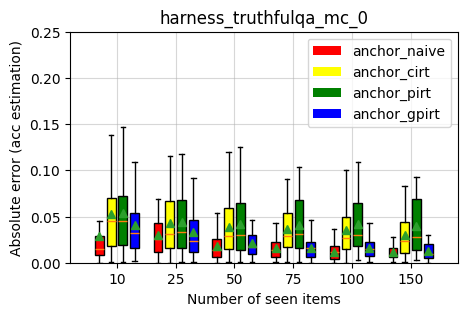

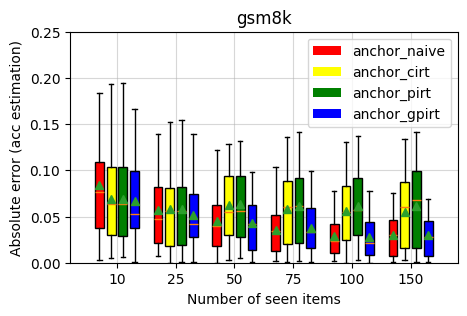

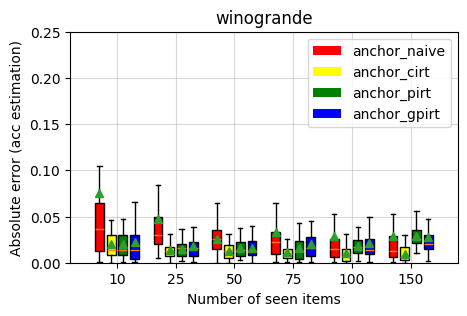

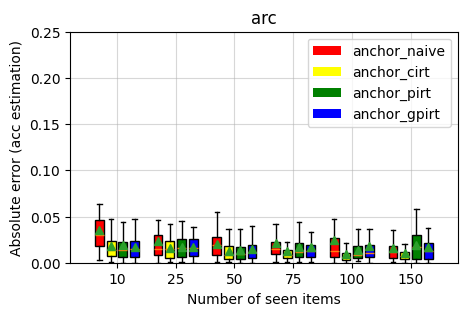

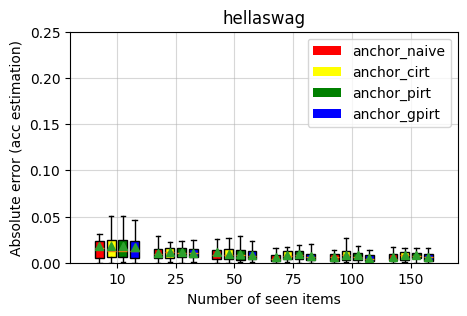

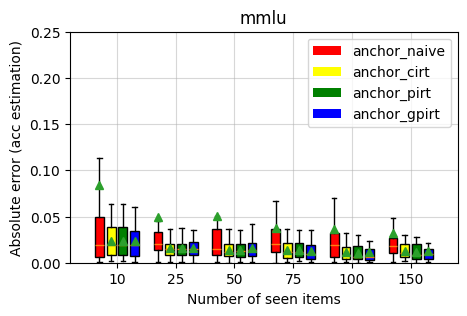

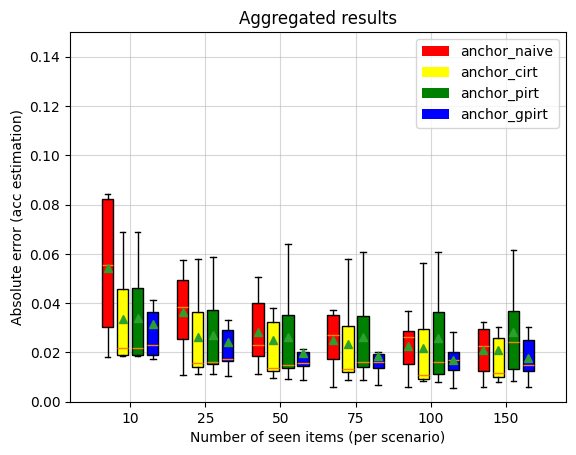

In [9]:
methods = ['anchor_naive', 'anchor_cirt', 'anchor_pirt', 'anchor_gpirt']
plot_results(results_full, scenarios.keys(), methods = methods)
plot_agg_results(results_full, scenarios.keys(), methods = methods)

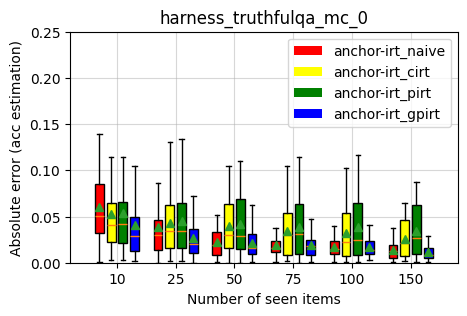

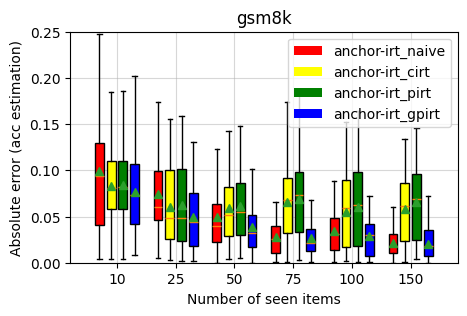

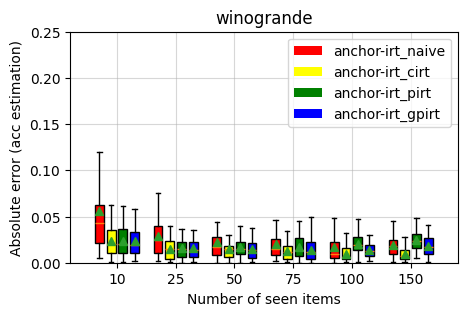

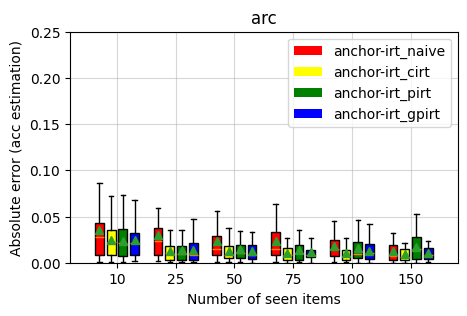

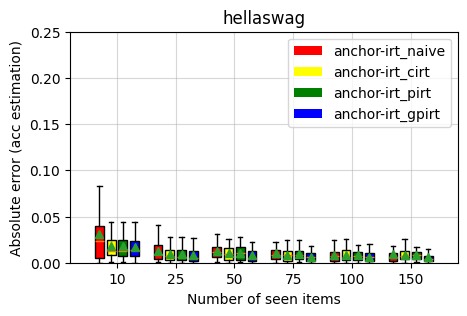

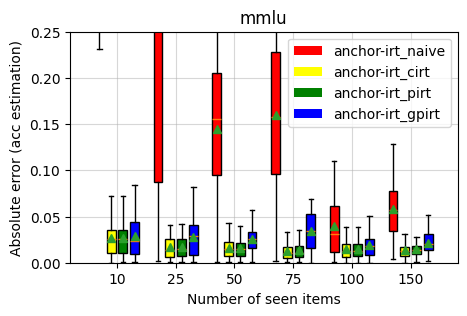

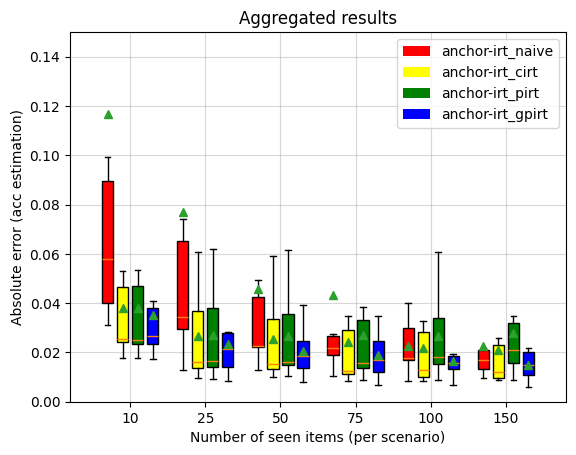

In [10]:
methods = ['anchor-irt_naive', 'anchor-irt_cirt', 'anchor-irt_pirt', 'anchor-irt_gpirt']
plot_results(results_full, scenarios.keys(), methods = methods)
plot_agg_results(results_full, scenarios.keys(), methods = methods)

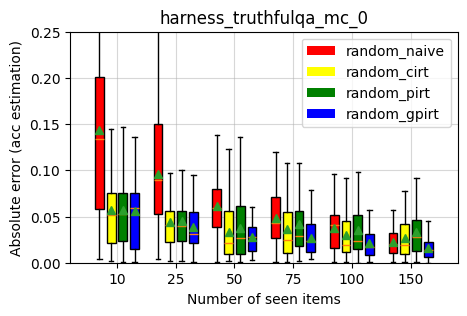

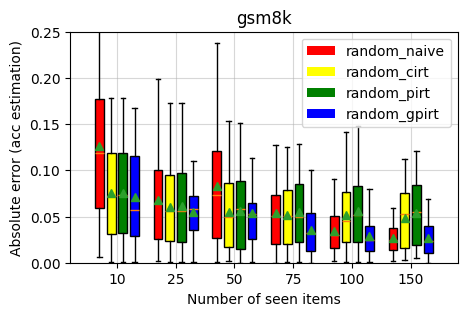

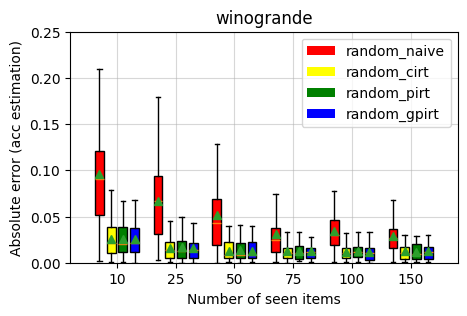

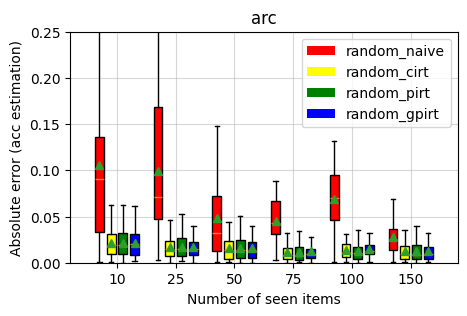

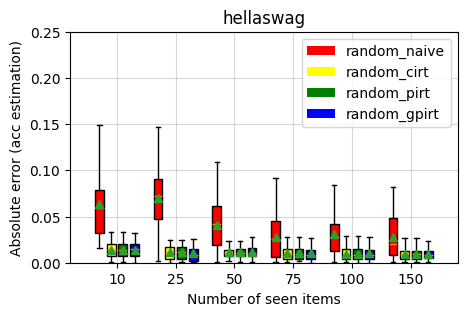

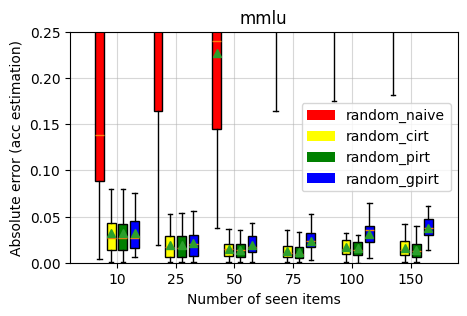

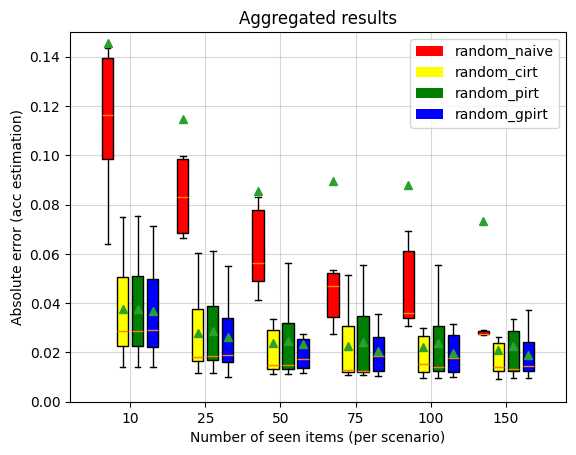

In [11]:
methods = ['random_naive', 'random_cirt', 'random_pirt', 'random_gpirt']
plot_results(results_full, scenarios.keys(), methods = methods)
plot_agg_results(results_full, scenarios.keys(), methods = methods)

In [12]:
chosen_scenarios = list(scenarios.keys())
models = accs_full.keys()
methods = ['random_naive','anchor_naive','anchor-irt_naive',
           #'random_cirt','anchor_cirt','anchor-irt_cirt',
           #'random_pirt','anchor_pirt','anchor-irt_pirt',
           'random_gpirt','anchor_gpirt','anchor-irt_gpirt']
iterations = 3

In [13]:
with open('data/lb.pickle', 'rb') as handle:
    data = pickle.load(handle)

scenarios_position, subscenarios_position = prepare_data(chosen_scenarios, scenarios, data)
scores = create_responses(chosen_scenarios, scenarios, data)
        
balance_weights = np.ones(scores.shape[1]) #for scenario in ['mmlu','civil_comments'], some items need to be up/downweighted, for other scenarios not
if 'civil_comments' in chosen_scenarios:
    balance_weights[scenarios_position['civil_comments']] = scores[:,scenarios_position['civil_comments']].max(axis=0)
    #(balance_weights==0).sum(axis=0) verifying that no item had weight 0 (the output should be zero)
    scores[:,scenarios_position['civil_comments']] = (scores[:,scenarios_position['civil_comments']]>0).astype(float)

if 'mmlu' in chosen_scenarios:
    N = len(scenarios_position['mmlu'])
    n_sub = len(scenarios['mmlu'])
    for sub in scenarios['mmlu']:
        n_i = len(subscenarios_position['mmlu'][sub])
        balance_weights[subscenarios_position['mmlu'][sub]] = N/(n_sub*n_i)
scores = balance_weights*scores

In [23]:
number_items = [10,25,50,75,100,150]
acc = np.vstack([scores[:,scenarios_position[scenario]].mean(axis=1) for scenario in chosen_scenarios])
acc = acc[:,set_of_rows[0]]

In [24]:
table_avg = {}
table_std = {}

for s,scenario in enumerate(chosen_scenarios):
    table_avg[scenario]= {}
    table_std[scenario]= {}
        
    for method in methods:
        table_avg[scenario][method]= {}
        table_std[scenario][method]= {}

        for number_item in number_items:
            acc_hat = np.array([accs_full[model][number_item][method][scenario] for model in models])
            out = np.array([np.abs(acc[s]-acc_hat[:,i]).mean() for i in range(acc_hat.shape[1])]).mean(axis=0)
            table_avg[scenario][method][number_item] = np.round((100*out),2)
            table_std[scenario][method][number_item] = np.round((100*out),2)

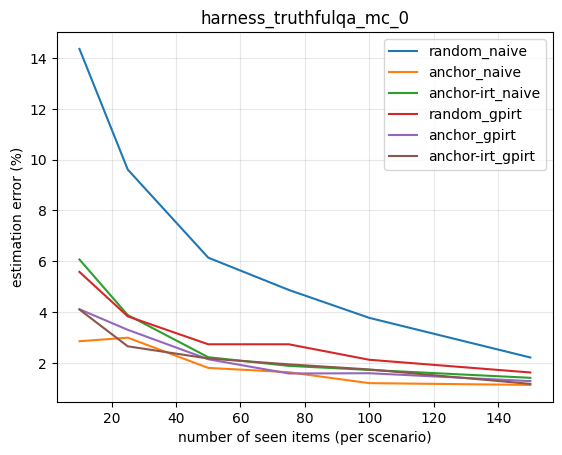

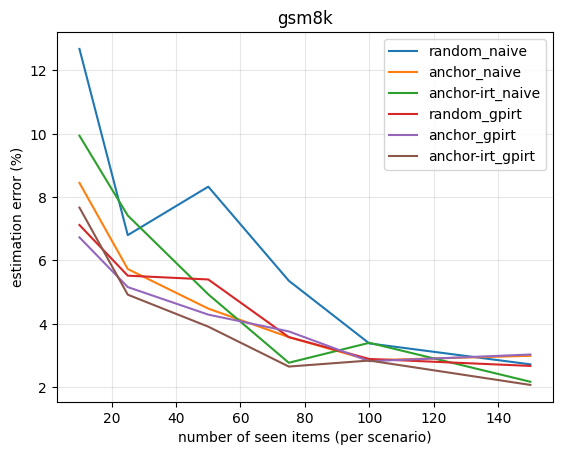

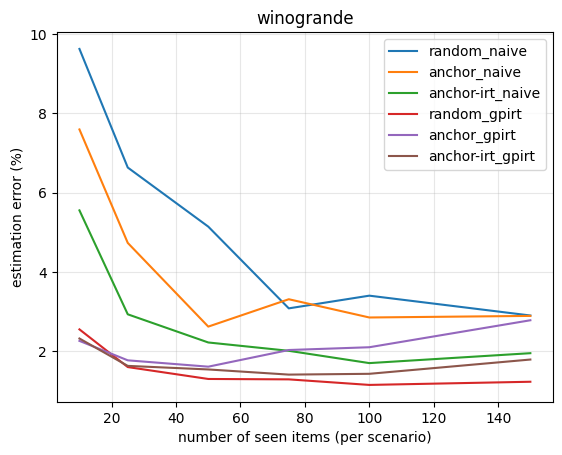

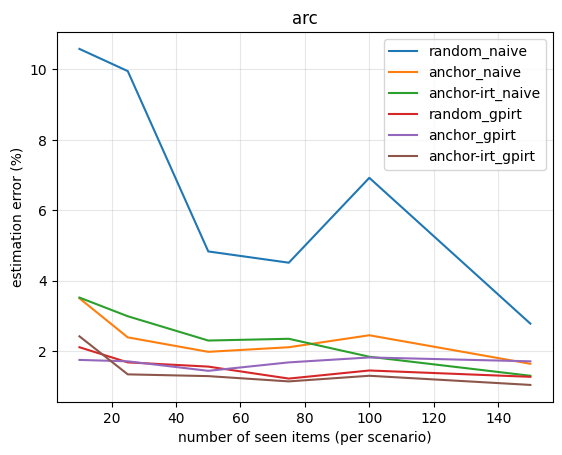

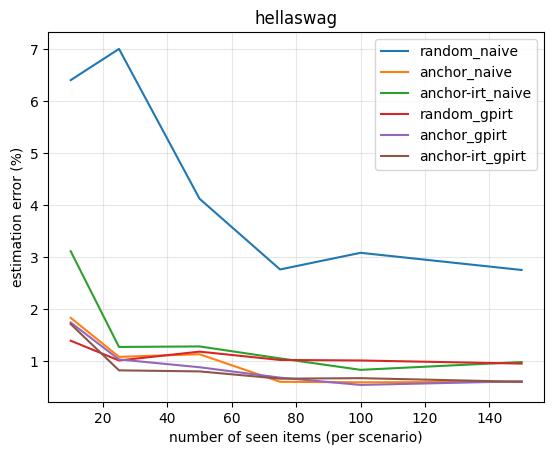

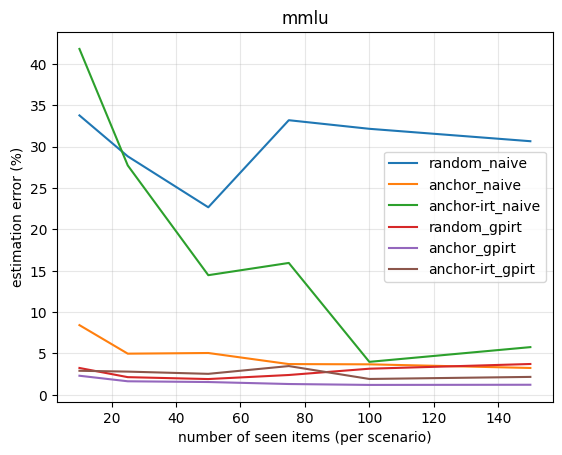

In [25]:
for s,scenario in enumerate(chosen_scenarios):
    pd.DataFrame(pd.DataFrame(table_avg[scenario])).plot()
    plt.grid(alpha=.3)
    plt.title(scenario)
    plt.ylabel('estimation error (%)')
    plt.xlabel('number of seen items (per scenario)')
    plt.show()

In [26]:
table_avg = {}
table_std = {}

for method in methods:
    table_avg[method]= {}
    table_std[method]= {}

    for number_item in number_items:
        acc_hat = np.array([[accs_full[model][number_item][method][scenario] for model in models] for scenario in chosen_scenarios])
        out = np.array([[np.abs(acc[s]-acc_hat[s,:,i]).mean() for s,_ in enumerate(chosen_scenarios)] for i in range(acc_hat.shape[2])]).mean(axis=0)
        table_avg[method][number_item] = np.round((100*out).mean(),2)
        table_std[method][number_item] = np.round((100*out).std(),2)

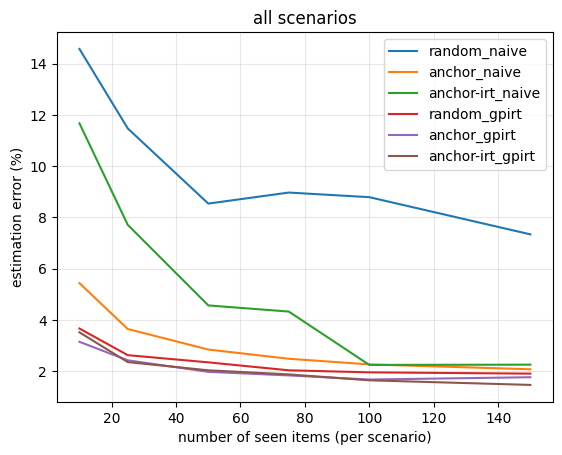

In [27]:
pd.DataFrame(table_avg).plot()
plt.grid(alpha=.3)
plt.title('all scenarios')
plt.ylabel('estimation error (%)')
plt.xlabel('number of seen items (per scenario)')
plt.show()

In [28]:
table_avg = {}
table_std = {}

for s,scenario in enumerate(chosen_scenarios):
    table_avg[scenario]= {}
    table_std[scenario]= {}
        
    for method in methods:
        table_avg[scenario][method]= {}
        table_std[scenario][method]= {}

        for number_item in number_items:
            acc_hat = np.array([accs_full[model][number_item][method][scenario] for model in models])
            out = np.array([stats.spearmanr(acc[s], acc_hat[:,i]).statistic for i in range(acc_hat.shape[1])]).mean(axis=0)
            table_avg[scenario][method][number_item] = np.round((100*out),2)
            table_std[scenario][method][number_item] = np.round((100*out),2)

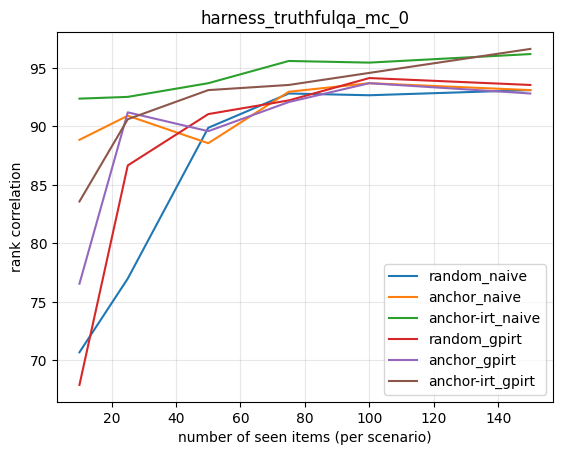

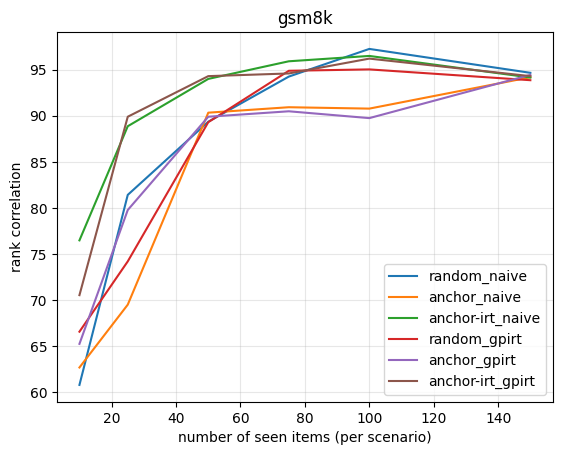

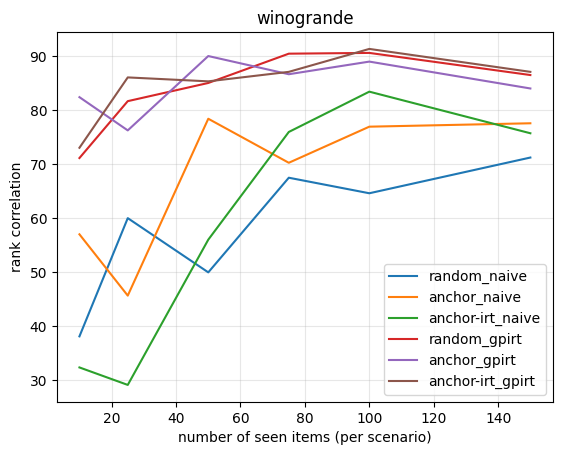

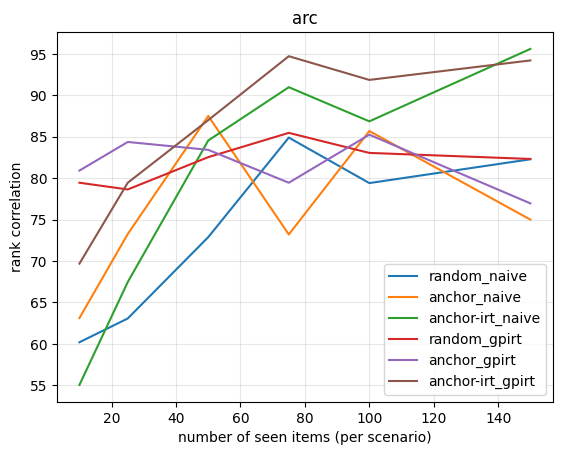

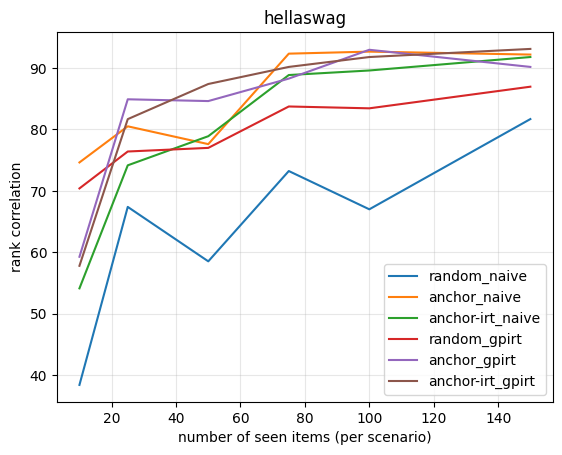

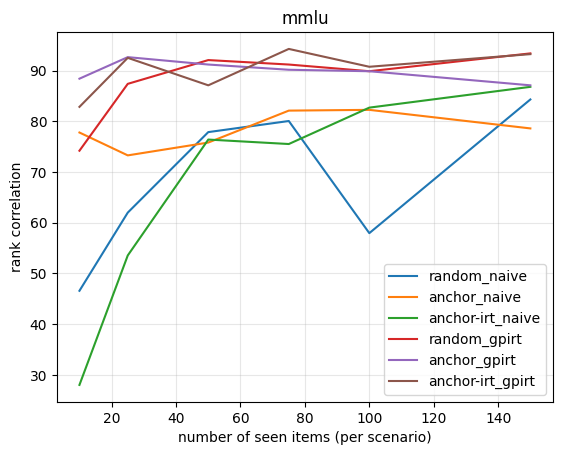

In [29]:
for s,scenario in enumerate(chosen_scenarios):
    pd.DataFrame(pd.DataFrame(table_avg[scenario])).plot()
    plt.grid(alpha=.3)
    plt.title(scenario)
    plt.ylabel('rank correlation')
    plt.xlabel('number of seen items (per scenario)')
    plt.show()

In [30]:
table_avg = {}
table_std = {}

for method in methods:
    table_avg[method]= {}
    table_std[method]= {}

    for number_item in number_items:
        acc_hat = np.array([[accs_full[model][number_item][method][scenario] for model in models] for scenario in chosen_scenarios])
        out = np.array([[stats.spearmanr(acc[s], acc_hat[s,:,i]).statistic for s,_ in enumerate(chosen_scenarios)] for i in range(acc_hat.shape[2])]).mean(axis=0)
        table_avg[method][number_item] = np.round((100*out).mean(),2)
        table_std[method][number_item] = np.round((100*out).std(),2)

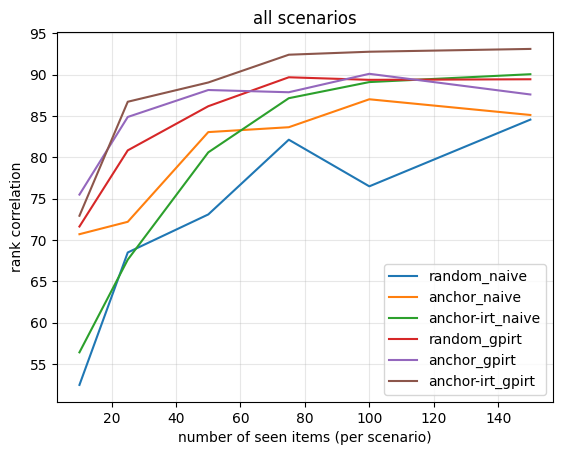

In [31]:
pd.DataFrame(table_avg).plot()
plt.grid(alpha=.3)
plt.title('all scenarios')
plt.ylabel('rank correlation')
plt.xlabel('number of seen items (per scenario)')
plt.show()

In [32]:
table_std

{'random_naive': {10: 12.25,
  25: 8.01,
  50: 14.82,
  75: 9.72,
  100: 14.58,
  150: 7.81},
 'anchor_naive': {10: 10.84,
  25: 13.75,
  50: 5.87,
  75: 9.18,
  100: 6.01,
  150: 8.14},
 'anchor-irt_naive': {10: 22.7,
  25: 21.59,
  50: 12.86,
  75: 8.42,
  100: 5.37,
  150: 7.11},
 'random_gpirt': {10: 4.26,
  25: 4.93,
  50: 5.28,
  75: 3.86,
  100: 4.68,
  150: 4.43},
 'anchor_gpirt': {10: 10.11,
  25: 5.79,
  50: 2.97,
  75: 4.13,
  100: 2.77,
  150: 5.88},
 'anchor-irt_gpirt': {10: 8.73,
  25: 4.79,
  50: 3.37,
  75: 2.83,
  100: 1.95,
  150: 2.92}}